# <font color='red'> Machine Learning

# Airline Passenger satisfaction survey

## Rohith Harisamudra Rajashekharaiah

# Classification with cross validation

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction? (Kaggle Airline Satisfaction)

Content :
    
1)  Gender: Gender of the passengers (Female, Male)                                                                                         
2)  Customer Type: The customer type (Loyal customer, disloyal customer)                                                                                                 
3)  Age: The actual age of the passengers                                                                                                              
4)  Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)                                                       
5)  Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)                                                             
6)  Flight distance: The flight distance of this journey                                                                                                 
7)  Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)                                                        
8)  Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient                                                     
9)  Ease of Online booking: Satisfaction level of online booking                                                                                    
10) Gate location: Satisfaction level of Gate location                                                                                                 
11) Food and drink: Satisfaction level of Food and drink                                                                                         
12) Online boarding: Satisfaction level of online boarding                                                                                                 
13) Seat comfort: Satisfaction level of Seat comfort                                                                                                      
14) Inflight entertainment: Satisfaction level of inflight entertainment                                                                                 
15) On-board service: Satisfaction level of On-board service                                                                                                                                
16) Leg room service: Satisfaction level of Leg room service                                                                                     
17) Baggage handling: Satisfaction level of baggage handling                                                                            
18) Check-in service: Satisfaction level of Check-in service                                                                                                
19) Online Support: Satisfaction level of online support                                                                                           
                                                                                                                                                                                                                                                                                                                                                                                               20) Cleanliness: Satisfaction level of Cleanliness                                                                                                      
21) Departure Delay in Minutes: Minutes delayed when departure                                                                                    
22) Arrival Delay in Minutes: Minutes delayed when Arrival                                                                            
                                                                                                                                                                                                                                                               23) Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
#importing all the libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#reading the csv file
data1 = pd.read_csv("Kaggle Airline Survey.csv")

# Exploratory Data Analysis

In [3]:
#checking the head of the csv - which reads the first five rows in the dataset
data1.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,110278,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,103199,satisfied,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,47462,satisfied,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,120011,satisfied,Female,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


In [4]:
#reading the dataset
data1 = data1.set_index('id')

In [5]:
#checking the hea of the dataset
data1.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
110278,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
103199,satisfied,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
47462,satisfied,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
120011,satisfied,Female,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


More than two categorical columns and more than 15 columns that satisfies the requirments too

In [6]:
#checking the columns name - apart from ID we can see that there are 23 columns 
data1.columns

Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
#checking the shape of the dataset
data1.shape

(4099, 23)

More than 1000 instances that satisfies the requirements

In [8]:
#checking the mean and qurtiles using the describe function
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4054.0,38.561174,17.667644,7.0,24.0,39.0,53.00,80.0
Flight Distance,4094.0,1665.247435,965.447547,50.0,873.0,1695.0,2258.75,6811.0
Seat comfort,4095.0,1.893040,1.763991,0.0,0.0,1.0,4.00,5.0
Departure/Arrival time convenient,4097.0,2.966317,1.501249,0.0,2.0,3.0,4.00,5.0
Food and drink,4078.0,1.874693,1.778304,0.0,0.0,1.0,4.00,5.0
Gate location,4099.0,2.970725,1.103755,1.0,2.0,3.0,4.00,5.0
Inflight wifi service,4075.0,3.082454,1.389728,0.0,2.0,3.0,4.00,5.0
Inflight entertainment,4039.0,2.328794,1.786206,0.0,1.0,2.0,4.00,5.0
Online support,4083.0,3.264022,1.353800,1.0,2.0,3.0,4.00,5.0
Ease of Online booking,4074.0,3.103338,1.377763,0.0,2.0,3.0,4.00,5.0


Some of the important observations:                                                                                                     
 
1) Age - The maximum age is 80 and the minimum age is 7


2) Flight Distance - The maximum distance travelled is 6811 and minimum distance travelled is 50                                                                                                                                   






3) Departure Delay - The maximum delay is 951 minutes and the minimum delay is 0 mins 



4) Arrival Delay - The maximum delay is 940 minutes and the minimum delay is 0 mins

In [9]:
#checking the null values
data1.isnull().sum().sort_values(ascending = False).head(17)

Inflight entertainment               60
Age                                  45
Online boarding                      40
Departure Delay in Minutes           32
Leg room service                     25
Ease of Online booking               25
Inflight wifi service                24
Cleanliness                          23
Food and drink                       21
Arrival Delay in Minutes             17
Online support                       16
Baggage handling                     15
On-board service                      6
Flight Distance                       5
Seat comfort                          4
Checkin service                       4
Departure/Arrival time convenient     2
dtype: int64

There are around 364 missing values in the dataset that is more than 5% and also satisfies the requirements

In [10]:
#checking the percentage of missing values in the dataset
missing_values= data1.isnull().sum().sort_values(ascending=False)
total_percent = (data1.isnull().sum()/data1.isnull().count()).sort_values(ascending=False)
total_missing_values_percent = pd.concat([missing_values,total_percent],axis=1,keys=['Total_count','Percent'])
total_missing_values_percent.head(17)

,Total_count,Percent
Inflight entertainment,60,0.014638
Age,45,0.010978
Online boarding,40,0.009758
Departure Delay in Minutes,32,0.007807
Leg room service,25,0.006099
Ease of Online booking,25,0.006099
Inflight wifi service,24,0.005855
Cleanliness,23,0.005611
Food and drink,21,0.005123
Arrival Delay in Minutes,17,0.004147


As per the project requirements we can see that there many null values in the dataset that satisfies the required condition.

In [11]:
#checking the datatypes of the columns present in the dataset
data1.dtypes

satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Seat comfort                         float64
Departure/Arrival time convenient    float64
Food and drink                       float64
Gate location                          int64
Inflight wifi service                float64
Inflight entertainment               float64
Online support                       float64
Ease of Online booking               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival De

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E222245EC8>,
      dtype=object)

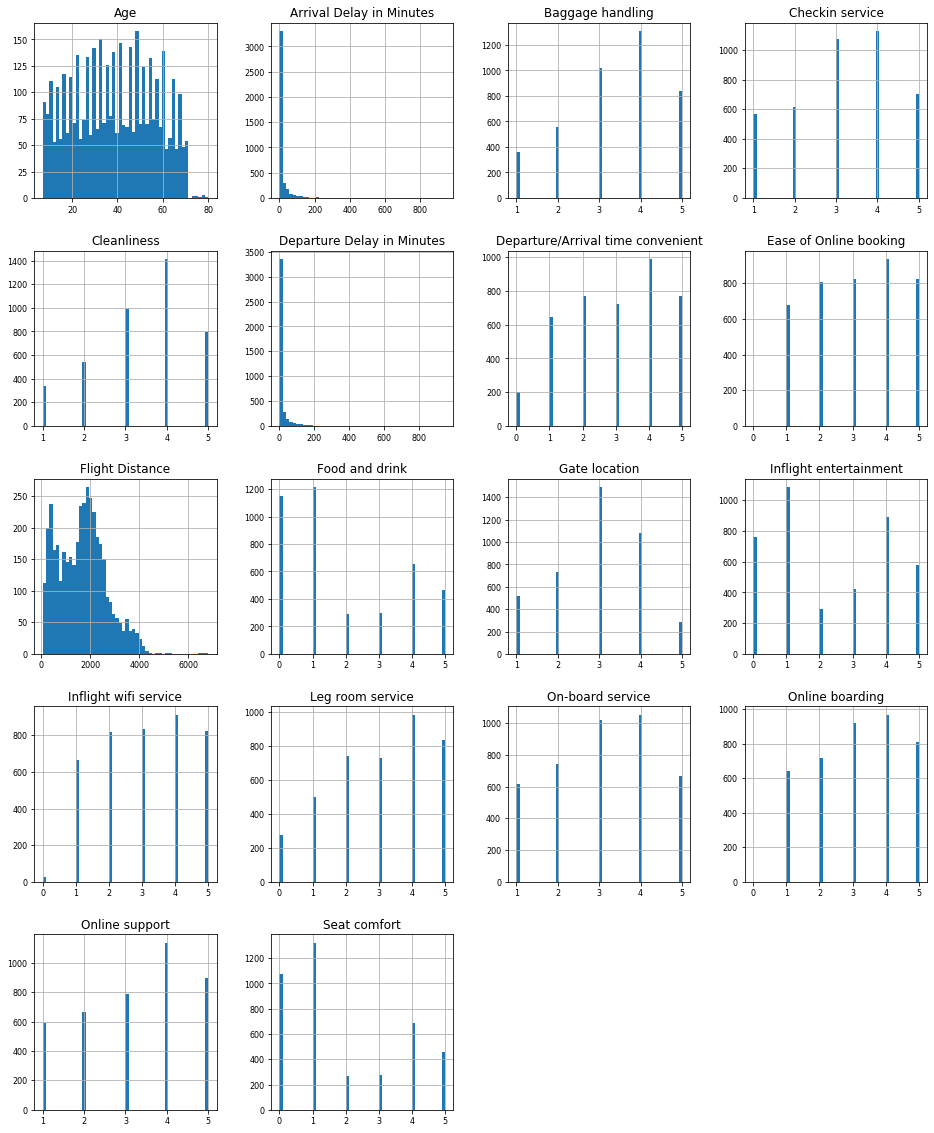

In [12]:
#Further exploration using histogram to check the distributions - EDA
data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
#Value_counts in satisfaction column
data1['satisfaction_v2'].value_counts()

satisfied                  2328
neutral or dissatisfied    1771
Name: satisfaction_v2, dtype: int64

In [14]:
#value_counts in Gender column
data1['Gender'].value_counts()

Female    2060
Male      2039
Name: Gender, dtype: int64

In [15]:
#value_counts in Customer Type column
data1['Customer Type'].value_counts()

Loyal Customer       3911
disloyal Customer     188
Name: Customer Type, dtype: int64

In [16]:
#value counts in Class column
data1['Class'].value_counts()

Eco         2940
Business     733
Eco Plus     426
Name: Class, dtype: int64

In [17]:
#Type of travel value counts
data1['Type of Travel'].value_counts()

Personal Travel    2932
Business travel    1167
Name: Type of Travel, dtype: int64

There are more than 2 categorical variables that satisfies the required criteria

Imputation and filling out the "Nan" values

In [18]:
#imputing the null values
data1['Age'] = data1['Age'].fillna((data1['Age'].mean()))
data1['Flight Distance'] = data1['Flight Distance'].fillna((data1['Flight Distance'].mean()))

In [19]:
#imputing the null values
data1['Seat comfort'] = data1['Seat comfort'].fillna((data1['Seat comfort'].median()))
data1['Departure/Arrival time convenient'] = data1['Departure/Arrival time convenient'].fillna((data1['Departure/Arrival time convenient'].mean()))

In [20]:
#imputing the null values
data1['Food and drink']=data1[['Food and drink','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))
data1['Gate location'] = data1['Gate location'].fillna((data1['Gate location'].median()))

In [21]:
#imputing the null values
data1['Inflight wifi service']=data1[['Inflight wifi service','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))
data1['Inflight entertainment']=data1[['Inflight entertainment','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))

In [22]:
#imputing the null values
data1['Online support'] = data1['Online support'].fillna((data1['Online support'].median()))
data1['Ease of Online booking'] = data1['Ease of Online booking'].fillna((data1['Ease of Online booking'].median()))

In [23]:
#imputing the null values
data1['On-board service']=data1[['On-board service','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))
data1['Leg room service']=data1[['Leg room service','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))                                  

In [24]:
#imputing the null values
data1['Baggage handling']=data1[['Baggage handling','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))
data1['Checkin service']=data1[['Checkin service','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))                                  

In [25]:
#imputing the null values
data1['Cleanliness']=data1[['Cleanliness','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))
data1['Online boarding']=data1[['Online boarding','Class','Gender']].groupby(['Class','Gender']).transform(lambda x: x.fillna(int(x.mean())))                                  

In [26]:
#imputing the null values
data1['Departure Delay in Minutes'] = data1['Departure Delay in Minutes'].fillna((data1['Departure Delay in Minutes'].median()))
data1['Arrival Delay in Minutes'] = data1['Arrival Delay in Minutes'].fillna((data1['Arrival Delay in Minutes'].median()))

In [27]:
#renaming the column names
data1 = data1.rename(columns={"Departure Delay in Minutes": "Departuredelay", "Arrival Delay in Minutes": "Arrivaldelay", "Inflight entertainment": "Flightent",
               "Inflight wifi service": "Flightwifi", "Ease of Online booking" : "Online bookease" ,"Departure/Arrival time convenient" : "Time coveniency","satisfaction_v2" : "satisfaction" ,
                             "Customer Type": "CustType", "Type of Travel": "TravelType", "Flight Distance": "FliDist", "Seat comfort": "SeatComfort"})

In [28]:
#checking if there are any null values present
data1.isnull().sum()

satisfaction        0
Gender              0
CustType            0
Age                 0
TravelType          0
Class               0
FliDist             0
SeatComfort         0
Time coveniency     0
Food and drink      0
Gate location       0
Flightwifi          0
Flightent           0
Online support      0
Online bookease     0
On-board service    0
Leg room service    0
Baggage handling    0
Checkin service     0
Cleanliness         0
Online boarding     0
Departuredelay      0
Arrivaldelay        0
dtype: int64

In [29]:
#checking unique names in categorical columns
print('satisfaction',data1.satisfaction.unique())
print('Gender',data1.Gender.unique())
print('CustType',data1.CustType.unique())
print('TravelType',data1.TravelType.unique())
print('Class',data1.Class.unique())

satisfaction ['satisfied' 'neutral or dissatisfied']
Gender ['Female' 'Male']
CustType ['Loyal Customer' 'disloyal Customer']
TravelType ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E223558C88>,
      dtype=object)

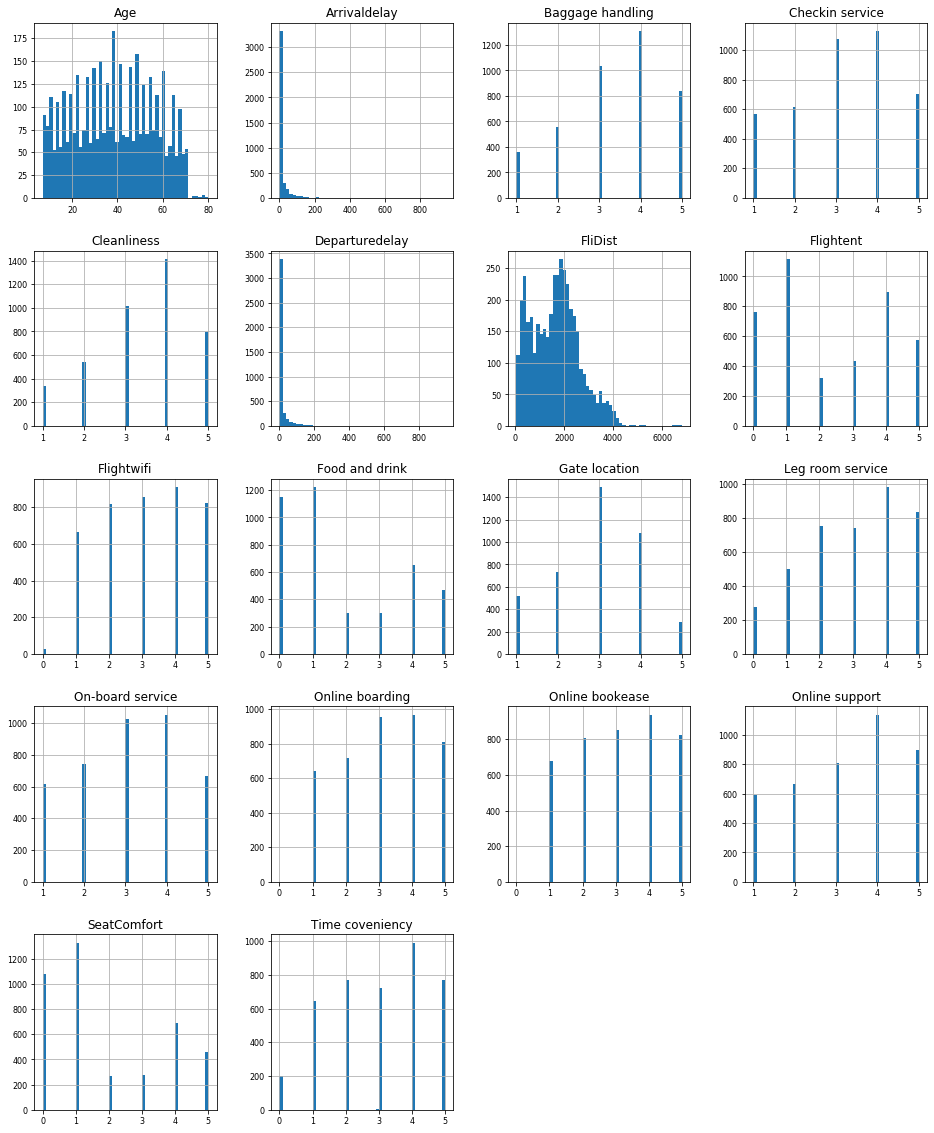

In [30]:
#plotting histogram once again after imputation
data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

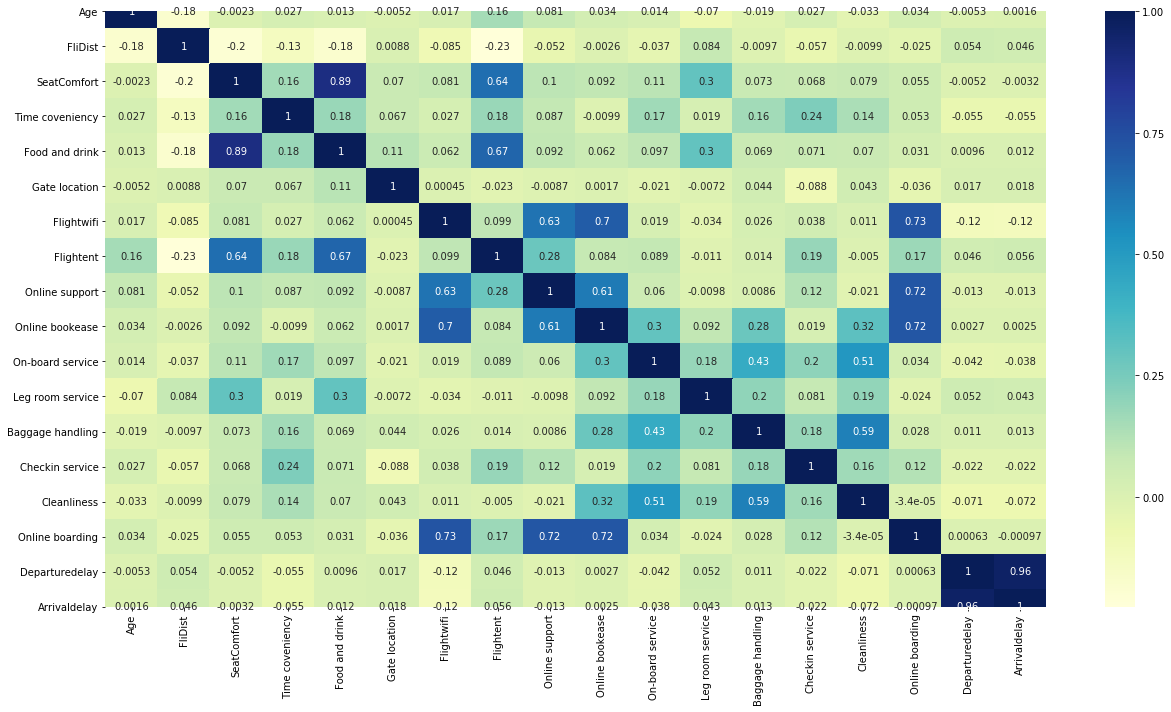

In [31]:
#checking the corelation map after imputation
#seat comfort - food and drink, arrival delay -departure delay have a good co relation among them
fig = plt.figure(figsize=(18,10))
sns.heatmap(data1.dropna().corr(),annot=True,cmap="YlGnBu")
plt.tight_layout()

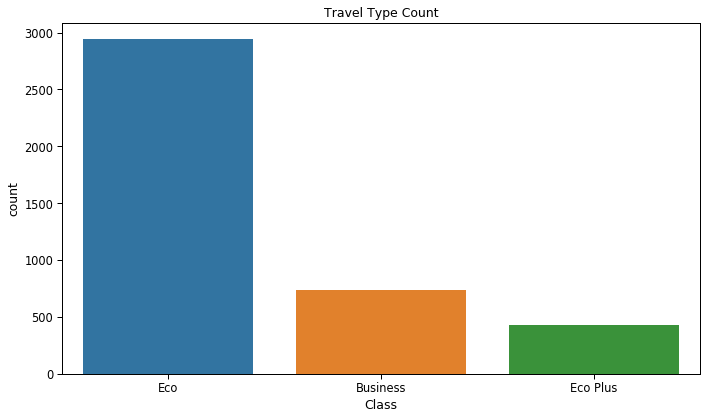

In [32]:
#plotting a seaborn map to see Class distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=data1,x='Class')
ax.set_title('Travel Type Count')
plt.tight_layout()
plt.show()

In [33]:
#assigning 0's and 1's to the categorical variables
data1['satisfaction'] = data1['satisfaction'].map( {'satisfied': 1, 'neutral or dissatisfied': 0} ).astype(int)
data1['Gender'] = data1['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)
data1['CustType'] = data1['CustType'].map( {'Loyal Customer': 1, 'disloyal Customer': 0} ).astype(int)
data1['TravelType'] = data1['TravelType'].map( {'Personal Travel': 1, 'Business travel': 0} ).astype(int)

In [34]:
#one hot encoding of class variable
one_hot_class = pd.get_dummies(data1.Class)

In [35]:
#once encoding is done we are dropping the class and appending one_hot_class to data1 df
data1.drop(['Class'],axis=1,inplace =True)
data1 = pd.concat([data1, one_hot_class], axis=1)

In [36]:
#checking the head once
data1.head()

,satisfaction,Gender,CustType,Age,TravelType,FliDist,SeatComfort,Time coveniency,Food and drink,Gate location,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departuredelay,Arrivaldelay,Business,Eco,Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
11112,1,1,1,65.0,1,265.0,0.0,0.0,0.0,2,...,0.0,3.0,5.0,3.0,2.0,0.0,0.0,0,1,0
110278,1,0,1,47.0,1,2464.0,0.0,0.0,0.0,3,...,4.0,4.0,2.0,3.0,2.0,310.0,305.0,1,0,0
103199,1,1,1,15.0,1,2138.0,0.0,0.0,0.0,3,...,3.0,4.0,4.0,4.0,2.0,0.0,0.0,0,1,0
47462,1,1,1,60.0,1,623.0,0.0,0.0,0.0,3,...,0.0,1.0,4.0,1.0,3.0,0.0,0.0,0,1,0
120011,1,1,1,70.0,1,354.0,0.0,0.0,0.0,3,...,0.0,2.0,4.0,2.0,5.0,0.0,0.0,0,1,0


In [37]:
#checking the column names again
data1.columns

Index(['satisfaction', 'Gender', 'CustType', 'Age', 'TravelType', 'FliDist',
       'SeatComfort', 'Time coveniency', 'Food and drink', 'Gate location',
       'Flightwifi', 'Flightent', 'Online support', 'Online bookease',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding', 'Departuredelay',
       'Arrivaldelay', 'Business', 'Eco', 'Eco Plus'],
      dtype='object')

In [38]:
#importing the libraries required for classification
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
#X and y split
y = data1['satisfaction'].values
X = data1.drop(['satisfaction'], axis = 1).values

In [40]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
#checking X values
X

array([[ 1.,  1., 65., ...,  0.,  1.,  0.],
       [ 0.,  1., 47., ...,  1.,  0.,  0.],
       [ 1.,  1., 15., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  1., 45., ...,  1.,  0.,  0.],
       [ 1.,  1., 66., ...,  0.,  1.,  0.],
       [ 1.,  1., 63., ...,  0.,  1.,  0.]])

In [42]:
# Scaling the dataset
#through histogram we see that data is not much normally distributed for some of the columns.  
#Hence we use Standard Scaler to normalize and scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K Nearest Neighbors

In [43]:
#using K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a new knn model
knn = KNeighborsClassifier()

# n_neighbors to test
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]

#using gridsearch to test all values for n-neighbors
knn_clf = GridSearchCV(knn, param_knn, cv=5)

#fitting the model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
#Best n_neighbhor value
knn_clf.best_params_

{'n_neighbors': 5}

In [45]:
#Validation score
knn_clf.best_score_

0.8815875081327261

In [46]:
#checking accuracy of train and test set
KNN_best = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.92
Accuracy of KNN classifier on test set: 0.88


In [47]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(knn,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.875      0.88780488 0.88130081 0.88110749 0.88273616]
Average cross-validation scroe: 0.8816


In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

KNN_predicted = KNN_best.predict(X_test)
cm = confusion_matrix(y_test, KNN_predicted)
cm

array([[379,  54],
       [ 67, 525]], dtype=int64)

In [49]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KNN_predicted)*100

88.19512195121952

# Logistic Regression

In [50]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,1000],'penalty':['l1', 'l2'] }

In [51]:
# Using Grid search to find the best parameters and fitting the model
logit_clf = GridSearchCV(logit, param_grid,cv=3)
logit_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
#calculating best parameters
logit_clf.best_params_

{'C': 1, 'penalty': 'l1'}

In [53]:
#using the parmeter to find out the train and test accuracy
LR = LogisticRegression(penalty = 'l2', C= 1)
LR.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(logit_clf.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.8439
Accuracy of logistic regression on test set: 0.8302


In [54]:
#Cross Validation
cvscore = cross_val_score(LR,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8262987  0.84878049 0.82601626 0.8485342  0.84527687]
Average cross-validation score: 0.8390


In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, LR_pred)
cm

array([[352,  81],
       [ 93, 499]], dtype=int64)

In [56]:
#Accuracy
accuracy_score(y_test,LR_pred)*100

83.02439024390243

# Decision Tree

In [57]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,5,7,15]}
# Using Grid search to find the best parameters and fitting the model
grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 7, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [58]:
#fiding out the best parameter- depth here
grid_search.best_params_

{'max_depth': 7}

In [59]:
#best score
grid_search.best_score_

0.9577098243331165

In [60]:
#training set and test set best accuracy
dt_clf_best = DecisionTreeClassifier(max_depth = 7)
dt_clf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test, y_test)))

Train score: 0.98
Test score: 0.96


In [61]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.93993506 0.95934959 0.96747967 0.96416938 0.95276873]
Average cross-validation score: 0.96


In [62]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
dt_predicted = dt_clf_best.predict(X_test)
cm = confusion_matrix(y_test, dt_predicted)
cm

array([[411,  22],
       [ 20, 572]], dtype=int64)

In [63]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predicted)*100

95.90243902439025

# Linear SVM

In [64]:
#using SVM
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear',max_iter=100000)
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [65]:
# Using Grid search to find the best parameters and fitting the model
LinearSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinearSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=100000, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
#finding the best parameter
LinearSVC_clf.best_params_

{'C': 1}

In [67]:
#applying the best paramerter and finding the test and train accuracy
from sklearn.svm import SVC, LinearSVC

clf = LinearSVC (C=10)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
print('Accuracy of linear SVM on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.4f}'
     .format(LinearSVC_clf.score(X_test, y_test)))

Accuracy of linear SVM on training set: 0.8302
Accuracy of linear SVM on test set: 0.8224


In [68]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8262987  0.83739837 0.81788618 0.82084691 0.83550489]
Average cross-validation score: 0.8276


In [69]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LSVM_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, LSVM_pred)
cm

array([[361,  72],
       [100, 492]], dtype=int64)

In [70]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LSVM_pred)*100

83.21951219512195

# Kernel SVM (RBF and Linear)

In [71]:
#using Kernel SVM
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [72]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
#finding the best paramrter
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [74]:
#finding thet train and test accuracy
KernelSVC_clf= SVC(kernel='rbf', C= 1, gamma= 0.1)
KernelSVC_clf.fit(X_train,y_train)
KernelSVC_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVC_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.99
Accuracy of Kernelized SVM on test set: 0.9483


In [75]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=10,gamma=0.1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.94480519 0.9398374  0.94796748 0.92019544 0.96091205]
Average cross-validation score: 0.9427


In [76]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
KSVM_pred = KernelSVC_clf.predict(X_test)
cm = confusion_matrix(y_test, KSVM_pred)
cm

array([[404,  29],
       [ 24, 568]], dtype=int64)

In [77]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KSVM_pred)*100

94.82926829268293

# Kernel SVM (Poly)

In [78]:
#using kernel SVM poly
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10],'gamma':[0.01,0.1,1], 'kernel':['poly']}

In [79]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [80]:
#fiding the best parameter
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [81]:
#accuracy on both training and test set
kernel_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.9196
Accuracy of Kernelized SVM on test set: 0.8732


In [82]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8262987  0.83739837 0.81788618 0.82084691 0.83550489]
Average cross-validation score: 0.8276


In [83]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
KPSVM_pred = kernel_clf.predict(X_test)
cm = confusion_matrix(y_test, KPSVM_pred)
cm

array([[369,  64],
       [ 91, 501]], dtype=int64)

In [84]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KPSVM_pred)*100  

84.8780487804878

Appending all the values to a grid shaped box as shown below

In [85]:
models_class=[]

models_class.append({'Model Name' : 'K Nearest Neighbors','Train score': round(KNN_best.score(X_train, y_train),2),
               'Test score': round(KNN_best.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,KNN_predicted)*100})

models_class.append({'Model Name' : 'Logistic Regression','Train score': round(LR.score(X_train, y_train),2),
               'Test score': round(LR.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,LR_pred)*100})

models_class.append({'Model Name' : 'Decision Tree','Train score': round(dt_clf_best.score(X_train, y_train),2),
               'Test score': round(dt_clf_best.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,dt_predicted)*100})

models_class.append({'Model Name' : 'Linear SVM','Train score': round(clf.score(X_train, y_train),2),
                     'Test score': round(clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,LSVM_pred)*100})

models_class.append({'Model Name' : 'Kernel SVM (RBF and Linear)','Train score': round(KernelSVC_clf.score(X_train, y_train),2),
                     'Test score': round(KernelSVC_clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,KSVM_pred)*100})

models_class.append({'Model Name' : 'Kernel SVM (Poly)','Train score': round(kernel_clf.score(X_train, y_train),2),
                     'Test score': round(kernel_clf.score(X_test, y_test),2), 'Accuracy Score' : round(accuracy_score(y_test,KPSVM_pred)*100)})

In [86]:
model_class = pd.DataFrame(models_class)
model_class.set_index('Model Name', inplace = True)
model_class

,Train score,Test score,Accuracy Score
Model Name,,,
K Nearest Neighbors,0.92,0.88,88.195122
Logistic Regression,0.84,0.83,83.024390
Decision Tree,0.98,0.96,95.902439
Linear SVM,0.83,0.83,83.219512
Kernel SVM (RBF and Linear),0.98,0.87,94.829268
Kernel SVM (Poly),0.92,0.85,85.000000


# From the accuracies populated above we can say that Decision Tree is the best Classifier with accuracy score of 96%

# Project 2 - Classification - To determine passenger satisfaction

# 1) Voting Classifier

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## a) Voting Classifier - Hard

In [88]:
logistic_clf = LogisticRegression(C=100, penalty= 'l2')
svc_clf = SVC(kernel = 'linear', gamma = 1, C=1, probability=True)
decisiontree_clf = DecisionTreeClassifier(max_depth= 5)

In [89]:
logistic_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
decisiontree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
voting = VotingClassifier(estimators=[('lr', logistic_clf), ('svc', svc_clf), ('dt', decisiontree_clf)], voting = 'hard')

In [91]:
print('log_clf: ', logistic_clf.score(X_train, y_train))
print('svc_clf: ', svc_clf.score(X_train, y_train))
print('dt_clf: ', decisiontree_clf.score(X_train, y_train))

log_clf:  0.843526350032531
svc_clf:  0.8288874430709173
dt_clf:  0.9573845152895251


In [92]:
voting = VotingClassifier(estimators=[('lr', logistic_clf), ('svc', svc_clf), ('dt', decisiontree_clf)], voting = 'hard')

In [93]:
print('log_clf: ', logistic_clf.score(X_train, y_train))
print('svc_clf: ', svc_clf.score(X_train, y_train))
print('dt_clf: ', decisiontree_clf.score(X_train, y_train))

log_clf:  0.843526350032531
svc_clf:  0.8288874430709173
dt_clf:  0.9573845152895251


In [94]:
voting.fit(X_train, y_train)
print('vot_clf Train:{0:.2f}'.format(voting.score(X_train, y_train)))
print('vot_clf Test: {0:.2f}'.format(voting.score(X_test, y_test)))

vot_clf Train:0.86
vot_clf Test: 0.85


## b) Voting Classifier - Soft

In [95]:
soft_voting = VotingClassifier(estimators=[('lr', logistic_clf), ('svc', svc_clf), ('dt', decisiontree_clf)], voting = 'soft')

In [96]:
soft_voting.fit(X_train, y_train)
print('vot_clf Train: {0:.2f}'.format(soft_voting.score(X_train, y_train)))
print('vot_clf Test: {0:.2f}'.format(soft_voting.score(X_test, y_test)))

vot_clf Train: 0.91
vot_clf Test: 0.91


### Voting Classifier Output Comparison

In [97]:
voting_classifier_comparison=pd.DataFrame(columns=['Hard Voting',' Soft Voting'],
                                   index=['Train','Test'])

In [98]:
voting_classifier_comparison.loc['Train'] = [round(voting.score(X_train, y_train),3),round(soft_voting.score(X_train, y_train),3)]
voting_classifier_comparison.loc['Test'] = [round(voting.score(X_test, y_test),3),round(soft_voting.score(X_train, y_train),3)]
voting_classifier_comparison

,Hard Voting,Soft Voting
Train,0.858,0.908
Test,0.853,0.908


### From above we can see that soft voting classifier performs way better than hard voting classifier

# 2) Bagging

### Bagging using decision tree

In [99]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 5)
bag_clf = BaggingClassifier(dt_clf, bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid1=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid1.fit(X_train, y_train)
train1=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {0:.2f}".format(train1.mean()))
print("Test score: {0:.2f}".format(grid1.score(X_test,y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 150}
Train score: 0.97
Test score: 0.96


### Bagging using Logistic Regression 

In [100]:
logistic_clf.fit(X_train, y_train)
bag_clf = BaggingClassifier(logistic_clf, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid2=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid2.fit(X_train, y_train)
train2=grid2.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid2.best_params_))
print("Train score: {0:.2f}".format(train2.mean()))
print("Test score: {0:.2f}".format(grid2.score(X_test,y_test)))

Best Parameters: {'max_samples': 100, 'n_estimators': 100}
Train score: 0.84
Test score: 0.83


### Bagging Output Comparison

In [101]:
bagging_classifier_comparison=pd.DataFrame(columns=['Decision Tree',' Logisitic Regression'],
                                   index=['Train','Test'])

In [102]:
bagging_classifier_comparison.loc['Train'] = [round(train1.mean(),2),round(train2.mean(),2)]
bagging_classifier_comparison.loc['Test'] = [round(grid1.score(X_test,y_test),3),round(grid2.score(X_test,y_test),2)]
bagging_classifier_comparison

,Decision Tree,Logisitic Regression
Train,0.97,0.84
Test,0.965,0.83


# 3) Pasting

### Pasting with Decision Tree Classifier

In [103]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 5)
bag_clf = BaggingClassifier(dt_clf, bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid3=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid3.fit(X_train, y_train)
train3=grid3.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid3.best_params_))
print("Train score: {0:.4f}".format(train3.mean()))
print("Test score: {0:.4f}".format(grid3.score(X_test,y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 150}
Train score: 0.9677
Test score: 0.9649


### Pasting with Logistic Regression

In [104]:
logistic_clf.fit(X_train, y_train)
bag_clf = BaggingClassifier(logistic_clf, bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid4=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid4.fit(X_train, y_train)
train4=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {0:.4f}".format(train4.mean()))
print("Test score: {0:.4f}".format(grid4.score(X_test,y_test)))

Best Parameters: {'max_samples': 100, 'n_estimators': 150}
Train score: 0.9677
Test score: 0.8371


### Pasting Output Comparison

In [105]:
pasting_classifier_comparison=pd.DataFrame(columns=['Decision Tree',' Logisitic Regression'],
                                   index=['Train','Test'])

In [106]:
pasting_classifier_comparison.loc['Train'] = [round(train3.mean(),3),round(train4.mean(),3)]
pasting_classifier_comparison.loc['Test'] = [round(grid3.score(X_test,y_test),3),round(grid4.score(X_test,y_test),3)]
pasting_classifier_comparison

,Decision Tree,Logisitic Regression
Train,0.968,0.968
Test,0.965,0.837


# 4) AdaBoosting

### AdaBoosting with Decision Tree Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0)
param_grid={'n_estimators':[10,20,30,40],'learning_rate':[0.5,1]}
grid5=GridSearchCV(ada_clf,param_grid,cv=5,return_train_score=True)
grid5.fit(X_train, y_train)
train5=grid5.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid5.best_params_))
print("Train score: {0:.4f}".format(train5.mean()))
print("Test score: {0:.4f}".format(grid5.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 40}
Train score: 0.9607
Test score: 0.9541


### AdaBoosting with Logistic Regression

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(LogisticRegression(solver="lbfgs"), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid6=GridSearchCV(ada_clf,param_grid,cv=5,return_train_score=True)
grid6.fit(X_train, y_train)
train6=grid6.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid6.best_params_))
print("Train score: {0:.4f}".format(train6.mean()))
print("Test score: {0:.4f}".format(grid6.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.8368
Test score: 0.8244


### AdaBoosting Output Comparison

In [109]:
AdaBoost_classifier_comparison=pd.DataFrame(columns=['Decision Tree',' Logisitic Regression'],
                                   index=['Train','Test'])

In [110]:
AdaBoost_classifier_comparison.loc['Train'] = [round(train5.mean(),3),round(train6.mean(),3)]
AdaBoost_classifier_comparison.loc['Test'] = [round(grid5.score(X_test,y_test),3),round(grid6.score(X_test,y_test),3)]
AdaBoost_classifier_comparison

,Decision Tree,Logisitic Regression
Train,0.961,0.837
Test,0.954,0.824


# 5) Gradient Boosting

In [111]:
from  sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(max_depth=2, random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid7=GridSearchCV(gradient_boosting,param_grid,cv=5,return_train_score=True)
grid7.fit(X_train, y_train)
train7=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {0:.3f}".format(train7.mean()))
print("Test score: {0:.3f}".format(grid7.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.996
Test score: 0.973


### Gradient Boosting Output

In [112]:
GradientBoosting_classifier=pd.DataFrame(columns=['Gradient Boosting Output'],
                                   index=['Train','Test'])

In [113]:
GradientBoosting_classifier.loc['Train'] = [round(train7.mean(),3)]
GradientBoosting_classifier.loc['Test'] = [round(grid7.score(X_test,y_test),3)]
GradientBoosting_classifier

,Gradient Boosting Output
Train,0.996
Test,0.973


# Random Forest Classifier

In [114]:
from  sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
param_grid={'n_estimators':[100, 300, 500],'max_depth':[5, 8, 15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,5]}
grid13=GridSearchCV(rf,param_grid,cv=2,return_train_score=True)
grid13.fit(X_train, y_train)
train13=grid13.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid13.best_params_))
print("Train score: {0:.3f}".format(train13.mean()))
print("Test score: {0:.3f}".format(grid13.score(X_test,y_test)))

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train score: 0.979
Test score: 0.971


# 6) Principal Component Analysis

In [115]:
#PCA-splitting for Kernel SVM(Linear and RBF) where we dont use pipeline - to match the before PCA run
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca_classification = PCA(n_components = .95)
X_train_pca = pca_classification.fit_transform(X_train)
X_test_pca = pca_classification.transform(X_test)

In [116]:
# number of components after PCA
pca_classification.n_components_

17

### a) KNN Classifier after PCA

In [117]:
clf = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("knn", KNeighborsClassifier())
    ])
param_grid5 = {'knn__n_neighbors': [3,7,5,9,11,13],'knn__weights': ['uniform','distance'],'knn__metric': ['euclidean','manhattan']}
grid8=GridSearchCV(clf,param_grid5,cv=10,return_train_score=True)
grid8.fit(X_train,y_train)
train8=grid8.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid8.best_params_))
print("Train score: {0:.4f}".format(train8.mean()))
print("Test score: {0:.4f}".format(grid8.score(X_test,y_test)))
print("Best Grid Search Score: {:.2f}".format(grid8.best_score_))

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Train score: 0.9524
Test score: 0.8732
Best Grid Search Score: 0.88


### b) Logistic Regression after PCA

In [118]:
clf4 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lr", LogisticRegression())
    ])
penalty = ['l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
hyperparameters = {"lr__C":C, "lr__penalty":penalty}
grid12=GridSearchCV(clf4,hyperparameters,cv=3,return_train_score=True)
grid12.fit(X_train,y_train)
train12=grid12.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid12.best_params_))
print("Train score: {}".format(train12.mean()))
print("Test score: {}".format(grid12.score(X_test,y_test)))

Best Parameters: {'lr__C': 10, 'lr__penalty': 'l2'}
Train score: 0.8289415022993568
Test score: 0.8273170731707317


### c) PCA with Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
tree_para = {'dt__criterion':['gini','entropy'],'dt__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf1 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("dt", DecisionTreeClassifier())
    ])
grid9=GridSearchCV(clf1,tree_para,cv=5,return_train_score=True)
grid9.fit(X_train,y_train)
train9=grid9.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid9.best_params_))
print("Train score: {:.4f}".format(train9.mean()))
print("Test score: {:.4f}".format(grid9.score(X_test,y_test)))

Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 10}
Train score: 0.9542
Test score: 0.7854


### d) Linear SVM after PCA

In [120]:
clf2 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvr", LinearSVC())
    ])
parameters2={'lsvr__C':[0.01, 0.1, 1]}
grid10=GridSearchCV(clf2,parameters2,cv=3,return_train_score=True)
grid10.fit(X_train,y_train)
train10=grid10.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid10.best_params_))
print("Train score: {:.4f}".format(train10.mean()))
print("Test score: {:.4f}".format(grid10.score(X_test,y_test)))

Best Parameters: {'lsvr__C': 0.1}
Train score: 0.8331
Test score: 0.8224


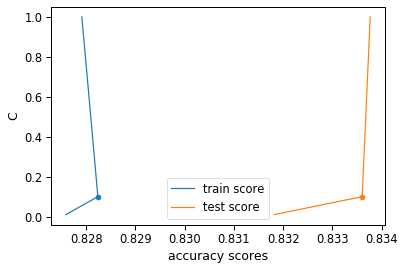

In [121]:
C=[0.01, 0.1, 1]
means = grid10.cv_results_['mean_test_score']
for i in C:
    if i==grid10.best_params_['lsvr__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train10,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train10[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

### e) Kernel SVM (RBF and Linear) after PCA

In [122]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [123]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
#it gives out rbf kernel as the best params
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [125]:
kernel_clf= SVC(kernel='rbf', C= 1, gamma= 0.1)
kernel_clf.fit(X_train_pca,y_train)
kernel_clf.score(X_train_pca,y_train)
print('train set: {:.4f}'
     .format(kernel_clf.score(X_train_pca, y_train)))
print('test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_pca, y_test)))

train set: 0.9776
test set: 0.9298


### f) Kernel SVM (Poly) after PCA

In [126]:
clf3 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("psvrk", SVC(kernel='poly',C=100,degree=1))
    ])
parameters2={"psvrk__C":[1,10,100],"psvrk__degree":[1,2,3]}
grid11=GridSearchCV(clf3,parameters2,cv=5,return_train_score=True)
grid11.fit(X_train,y_train)
train11=grid11.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid11.best_params_))
print("Train score: {0:.4f}".format(train11.mean()))
print("Test score: {0:.4f}".format(grid11.score(X_test,y_test)))

Best Parameters: {'psvrk__C': 100, 'psvrk__degree': 2}
Train score: 0.9022
Test score: 0.9024


### Scores of Algorithm runs without PCA - Cumulative 

In [127]:
models_class1=[]

models_class1.append({'Model Name' : 'K Nearest Neighbors','Train score': 0.92 ,'Test score': 0.88})

models_class1.append({'Model Name' : 'Logistic Regression','Train score': 0.84,'Test score': 0.83})

models_class1.append({'Model Name' : 'Decision Tree','Train score': 0.98,'Test score': 0.96})

models_class1.append({'Model Name' : 'Linear SVM','Train score': 0.83 ,'Test score': 0.82})

models_class1.append({'Model Name' : 'Kernel SVM (RBF and Linear)','Train score': 0.98,'Test score': 0.87})

models_class1.append({'Model Name' : 'Kernel SVM (Poly)','Train score': 0.92,'Test score': 0.85})

### Scores of algorithms run with PCA - Cumulative

In [128]:
models_class2=[]

models_class2.append({'Model Name' : 'K Nearest Neighbors','Train score': 0.95,'Test score': 0.88})

models_class2.append({'Model Name' : 'Logistic Regression','Train score': 0.83,'Test score': 0.82})

models_class2.append({'Model Name' : 'Decision Tree','Train score': 0.95,'Test score': 0.78})

models_class2.append({'Model Name' : 'Linear SVM','Train score': 0.83,'Test score': 0.82})

models_class2.append({'Model Name' : 'Kernel SVM (RBF and Linear)','Train score': 0.97,'Test score': 0.92})

models_class2.append({'Model Name' : 'Kernel SVM (Poly)','Train score': 0.89,'Test score': 0.90})

### Comparison of Algorithm runs before and after PCA

In [129]:
#Before PCA
model_class1 = pd.DataFrame(models_class1)
model_class1.set_index('Model Name', inplace = True)
model_class1

,Train score,Test score
Model Name,,
K Nearest Neighbors,0.92,0.88
Logistic Regression,0.84,0.83
Decision Tree,0.98,0.96
Linear SVM,0.83,0.82
Kernel SVM (RBF and Linear),0.98,0.87
Kernel SVM (Poly),0.92,0.85


In [130]:
#After PCA
model_class2 = pd.DataFrame(models_class2)
model_class2.set_index('Model Name', inplace = True)
model_class2

,Train score,Test score
Model Name,,
K Nearest Neighbors,0.95,0.88
Logistic Regression,0.83,0.82
Decision Tree,0.95,0.78
Linear SVM,0.83,0.82
Kernel SVM (RBF and Linear),0.97,0.92
Kernel SVM (Poly),0.89,0.90


## PCA can be used as it reduces computational complexity. With reduction in the number of dimensions, it reduces computational power and also some algorithms seems to perform well with PCA. Kernel SVM (RBF and Linear) seems to perform well with PCA based on the scores populated above.

# Deep Learning Model - Classification: Neural Networks

In [131]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Step 1: Build the model
model1 = Sequential()
#Input layer
model1.add(Dense(126, input_dim = 24, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model1.fit(X_train, y_train, epochs = 30, batch_size = 50)

In [ ]:
seed = 10
np.random.seed(10)

In [ ]:
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# Regression with Cross Validation

Predict the housing price of a California housing dataset using regression techiques: 

Content:


1) GrLivArea: Above ground living area
















2) Street: Type of Street  








3) OverallQual: Overall Quality of the house  















4) GarageCars: Number of cars the garage can fit                                                                                                                                





















5) GarageArea: Area of the Garage    















6) LandSlope: Type of LandSlope  





7) TotRmsAbvGrd: Total Number of Rooms above Ground                                                                                                                                  
























8) Utilities: Type of Utilities 






9) FullBath: Total full bathrooms available     









10) X1stFlrSF: First Floor Sq.Ft  


























11) TotalBsmtSF: Total Basement Sq.Ft 



















12) age: Age of the House  
















13) YearBuilt: Year the house was built    



















14) YearRemodAdd: Year the remodification was added 















15) Fireplaces: Total Number of Fireplaces present 






16) GarageYrBlt: Year the Garage was built  















17) MasVnrArea: Mason Veneer Area   

























18) LotArea: Area of the Lot  












19) X2ndFlrSF: Second Floor Sq.Ft                                                                                                                                  












20) BedroomAbvGr: Total Number of Bedrooms above ground 











21) BsmtFinSF1 : Finished Basement Sq.Ft    












22) HalfBath: Total number of half baths












23) SalePrice: Sale Price of the house

In [132]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing  import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [133]:
#reading the dataset
data2 = pd.read_csv('CA - Housing Price Prediction.csv')

In [134]:
#setting Id as index to avoid an index label being created again
data2 = data2.set_index('Id')

In [135]:
#reading the top 5 rows of the dataset
data2.head()

,GrLivArea,Street,OverallQual,GarageCars,GarageArea,LandSlope,TotRmsAbvGrd,Utilities,FullBath,X1stFlrSF,...,YearRemodAdd,Fireplaces,GarageYrBlt,MasVnrArea,LotArea,X2ndFlrSF,BedroomAbvGr,BsmtFinSF1,HalfBath,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1445,Pave,6,2,484,Gtl,6.0,AllPub,2,831.0,...,1993,0,1957,0.0,14235.0,614.0,3.0,0.0,0,184380.7391
2,965,Pave,5,2,580,Gtl,4.0,AllPub,1,965.0,...,1996,0,1998,0.0,11105.0,0.0,2.0,870.0,0,169364.4692
3,1692,Pave,7,2,513,Gtl,8.0,AllPub,2,892.0,...,1998,1,1997,0.0,9337.0,800.0,3.0,353.0,1,175846.1798
4,1026,Pave,5,1,308,Gtl,5.0,AllPub,1,1026.0,...,2004,0,1977,0.0,15240.0,0.0,3.0,198.0,1,189673.2953
5,876,Pave,5,2,484,Gtl,5.0,AllPub,1,876.0,...,1972,0,1977,0.0,7480.0,0.0,3.0,480.0,0,174401.3177


In [136]:
#checking the shape of the dataset
data2.shape

(1342, 23)

It has 1342 rows and 23 columns that satisfy one of the required criteria

In [137]:
#checking the column names of the dataset
data2.columns

Index(['GrLivArea', 'Street', 'OverallQual', 'GarageCars', 'GarageArea',
       'LandSlope', 'TotRmsAbvGrd', 'Utilities', 'FullBath', 'X1stFlrSF',
       'TotalBsmtSF', 'age', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'GarageYrBlt', 'MasVnrArea', 'LotArea', 'X2ndFlrSF', 'BedroomAbvGr',
       'BsmtFinSF1', 'HalfBath', 'SalePrice'],
      dtype='object')

In [138]:
#checking the min,max,count,std dev of the dataset
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1342.0,1487.920268,492.181031,407.0000,1112.000000,1430.0000,1728.000000,5095.0000
OverallQual,1342.0,6.090909,1.447286,1.0000,5.000000,6.0000,7.000000,10.0000
GarageCars,1342.0,1.773472,0.776777,0.0000,1.000000,2.0000,2.000000,5.0000
GarageArea,1342.0,474.179583,217.688206,0.0000,319.250000,480.0000,576.000000,1488.0000
TotRmsAbvGrd,1334.0,6.402549,1.505885,3.0000,5.000000,6.0000,7.000000,15.0000
FullBath,1342.0,1.576006,0.556801,0.0000,1.000000,2.0000,2.000000,4.0000
X1stFlrSF,1314.0,1156.883562,398.922724,407.0000,873.250000,1077.0000,1381.500000,5095.0000
TotalBsmtSF,1315.0,1045.782890,431.141601,0.0000,794.500000,989.0000,1309.000000,2660.0000
age,1342.0,35.722802,30.186851,-1.0000,7.000000,33.5000,54.000000,129.0000
YearBuilt,1342.0,1971.808495,30.193087,1879.0000,1954.000000,1974.0000,2001.000000,2009.0000


In [139]:
#checking the top null values of the dataset
data2.isnull().sum().sort_values(ascending = False).head(7)

X1stFlrSF       28
TotalBsmtSF     27
LotArea          9
TotRmsAbvGrd     8
X2ndFlrSF        7
BedroomAbvGr     2
MasVnrArea       2
dtype: int64

There are around 83 null values which is around 6% of the dataset and it satisfies the given criteria

In [140]:
#checking the percentage of missing values in the dataset for each column
missing_values= data2.isnull().sum().sort_values(ascending=False)
total_percent = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
total_missing_values_percent2 = pd.concat([missing_values,total_percent],axis=1,keys=['Total_count','Percent'])
total_missing_values_percent2.head(7)

,Total_count,Percent
X1stFlrSF,28,0.020864
TotalBsmtSF,27,0.020119
LotArea,9,0.006706
TotRmsAbvGrd,8,0.005961
X2ndFlrSF,7,0.005216
BedroomAbvGr,2,0.001490
MasVnrArea,2,0.001490


In [141]:
#checking the datatype of each column
data2.dtypes

GrLivArea         int64
Street           object
OverallQual       int64
GarageCars        int64
GarageArea        int64
LandSlope        object
TotRmsAbvGrd    float64
Utilities        object
FullBath          int64
X1stFlrSF       float64
TotalBsmtSF     float64
age               int64
YearBuilt         int64
YearRemodAdd      int64
Fireplaces        int64
GarageYrBlt       int64
MasVnrArea      float64
LotArea         float64
X2ndFlrSF       float64
BedroomAbvGr    float64
BsmtFinSF1      float64
HalfBath          int64
SalePrice       float64
dtype: object

Street, LandSlope, Utilities are the three columns that are categorical and they satisfy the required criteria too.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E23181AEC8>,
      dtype=object)

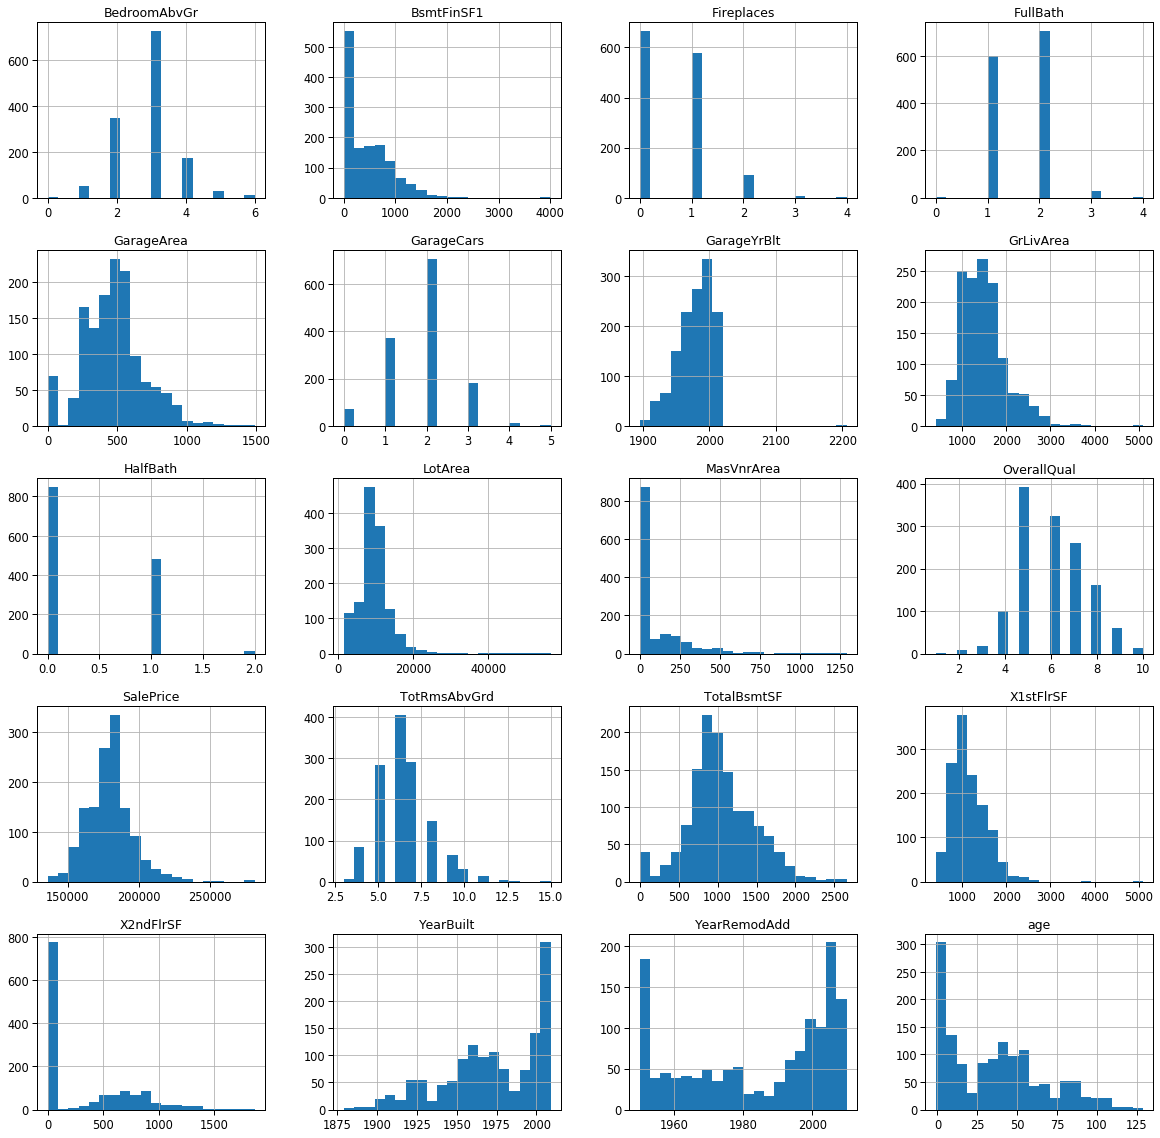

In [142]:
#checking the histogram to note the distribution of the columns in dataset
data2.hist(bins = 20 , figsize= (20,20))

There are 3 categorical columns that are not represented in the above graph

In [143]:
#checking the info of the dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1342
Data columns (total 23 columns):
GrLivArea       1342 non-null int64
Street          1342 non-null object
OverallQual     1342 non-null int64
GarageCars      1342 non-null int64
GarageArea      1342 non-null int64
LandSlope       1342 non-null object
TotRmsAbvGrd    1334 non-null float64
Utilities       1342 non-null object
FullBath        1342 non-null int64
X1stFlrSF       1314 non-null float64
TotalBsmtSF     1315 non-null float64
age             1342 non-null int64
YearBuilt       1342 non-null int64
YearRemodAdd    1342 non-null int64
Fireplaces      1342 non-null int64
GarageYrBlt     1342 non-null int64
MasVnrArea      1340 non-null float64
LotArea         1333 non-null float64
X2ndFlrSF       1335 non-null float64
BedroomAbvGr    1340 non-null float64
BsmtFinSF1      1342 non-null float64
HalfBath        1342 non-null int64
SalePrice       1342 non-null float64
dtypes: float64(9), int64(11), object(3)
mem

In [144]:
#using fillna to fill the null values in the dataset
#when the missing value is ore than 10 we are using median and when its below 10 we are using mean
data2['TotalBsmtSF'] = data2['TotalBsmtSF'].fillna((data2['TotalBsmtSF'].median()))
data2['X1stFlrSF'] = data2['X1stFlrSF'].fillna((data2['X1stFlrSF'].median()))
data2['X2ndFlrSF'] = data2['X2ndFlrSF'].fillna((data2['X2ndFlrSF'].median()))
data2['TotRmsAbvGrd'] = data2['TotRmsAbvGrd'].fillna((data2['TotRmsAbvGrd'].median()))
data2['LotArea'] = data2['LotArea'].fillna((data2['LotArea'].median()))

In [145]:
#fillna criteria
data2['BedroomAbvGr'] = data2['BedroomAbvGr'].fillna((data2['BedroomAbvGr'].mean()))
data2['MasVnrArea'] = data2['MasVnrArea'].fillna((data2['MasVnrArea'].mean()))

In [146]:
#checking the null values after imputation
data2.isnull().sum().sort_values(ascending = False)

SalePrice       0
TotalBsmtSF     0
Street          0
OverallQual     0
GarageCars      0
GarageArea      0
LandSlope       0
TotRmsAbvGrd    0
Utilities       0
FullBath        0
X1stFlrSF       0
age             0
HalfBath        0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
LotArea         0
X2ndFlrSF       0
BedroomAbvGr    0
BsmtFinSF1      0
GrLivArea       0
dtype: int64

In [147]:
#checing the info once again after imputation
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1342
Data columns (total 23 columns):
GrLivArea       1342 non-null int64
Street          1342 non-null object
OverallQual     1342 non-null int64
GarageCars      1342 non-null int64
GarageArea      1342 non-null int64
LandSlope       1342 non-null object
TotRmsAbvGrd    1342 non-null float64
Utilities       1342 non-null object
FullBath        1342 non-null int64
X1stFlrSF       1342 non-null float64
TotalBsmtSF     1342 non-null float64
age             1342 non-null int64
YearBuilt       1342 non-null int64
YearRemodAdd    1342 non-null int64
Fireplaces      1342 non-null int64
GarageYrBlt     1342 non-null int64
MasVnrArea      1342 non-null float64
LotArea         1342 non-null float64
X2ndFlrSF       1342 non-null float64
BedroomAbvGr    1342 non-null float64
BsmtFinSF1      1342 non-null float64
HalfBath        1342 non-null int64
SalePrice       1342 non-null float64
dtypes: float64(9), int64(11), object(3)
mem

In [148]:
#checking the correlation between the variables using corr() function
data2.corr()

,GrLivArea,OverallQual,GarageCars,GarageArea,TotRmsAbvGrd,FullBath,X1stFlrSF,TotalBsmtSF,age,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,MasVnrArea,LotArea,X2ndFlrSF,BedroomAbvGr,BsmtFinSF1,HalfBath,SalePrice
GrLivArea,1.000000,0.569597,0.527667,0.518675,0.791113,0.639626,0.546510,0.390585,-0.302210,0.301369,0.353639,0.462549,0.310623,0.424317,0.365856,0.621109,0.514403,0.224143,0.463788,0.568940
OverallQual,0.569597,1.000000,0.604703,0.574958,0.372678,0.510553,0.482909,0.565874,-0.623725,0.624794,0.590014,0.403921,0.561825,0.464646,0.107443,0.200712,0.059937,0.345718,0.273917,0.102438
GarageCars,0.527667,0.604703,1.000000,0.896140,0.378865,0.491565,0.432882,0.447189,-0.528179,0.529931,0.432134,0.344129,0.488979,0.364018,0.265783,0.190565,0.115923,0.307640,0.248645,0.245783
GarageArea,0.518675,0.574958,0.896140,1.000000,0.345495,0.413483,0.488313,0.483211,-0.475448,0.477394,0.380259,0.323230,0.467236,0.387714,0.316383,0.128803,0.100612,0.345638,0.196175,0.264058
TotRmsAbvGrd,0.791113,0.372678,0.378865,0.345495,1.000000,0.509850,0.359704,0.239783,-0.152314,0.151932,0.216735,0.299466,0.182888,0.277436,0.291256,0.558085,0.660305,0.070523,0.367877,0.622369
FullBath,0.639626,0.510553,0.491565,0.413483,0.509850,1.000000,0.359482,0.336098,-0.473554,0.473558,0.479619,0.241456,0.487203,0.243928,0.150221,0.392531,0.357871,0.117503,0.196378,0.329912
X1stFlrSF,0.546510,0.482909,0.432882,0.488313,0.359704,0.359482,1.000000,0.711086,-0.338681,0.339188,0.242245,0.403933,0.274087,0.446170,0.433741,-0.292257,0.081005,0.472611,-0.080547,0.323650
TotalBsmtSF,0.390585,0.565874,0.447189,0.483211,0.239783,0.336098,0.711086,1.000000,-0.429097,0.428561,0.304381,0.325728,0.360439,0.408330,0.234041,-0.225507,0.057982,0.510367,-0.059193,0.184442
age,-0.302210,-0.623725,-0.528179,-0.475448,-0.152314,-0.473554,-0.338681,-0.429097,1.000000,-0.997894,-0.629623,-0.197741,-0.794636,-0.313303,-0.042559,-0.038209,0.026800,-0.318423,-0.300977,-0.009609
YearBuilt,0.301369,0.624794,0.529931,0.477394,0.151932,0.473558,0.339188,0.428561,-0.997894,1.000000,0.633616,0.197319,0.797500,0.312698,0.042058,0.036733,-0.026623,0.319940,0.302302,0.006928


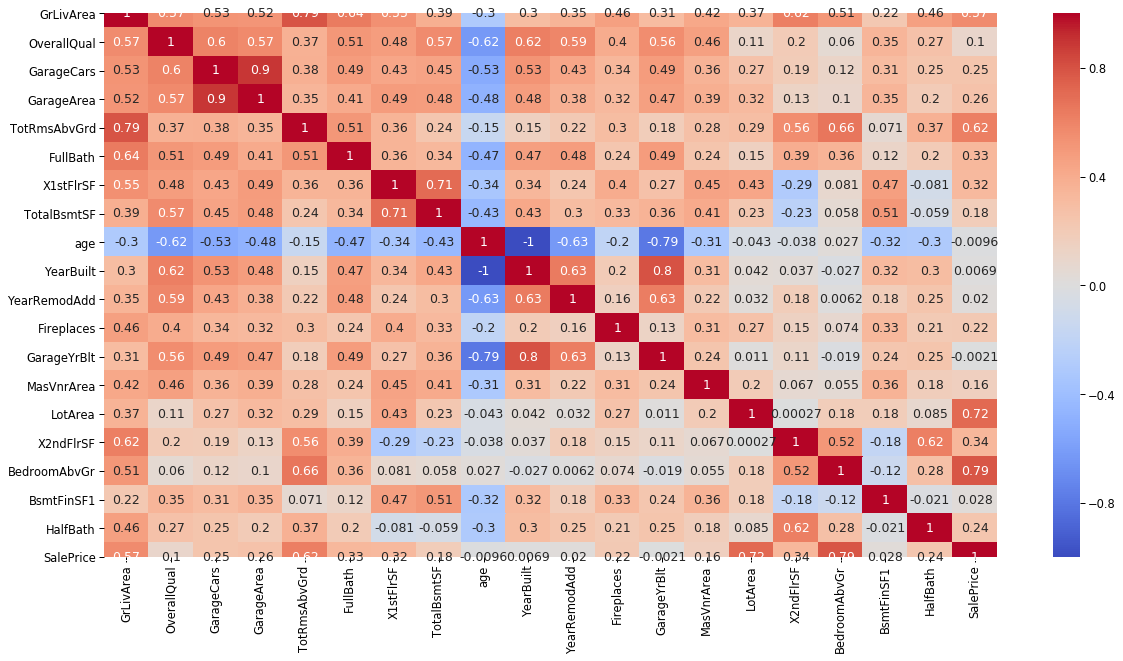

In [149]:
#plotting the same corr in a heatmap
#Based on the graph we can see that garage cars is highly correlated to grage area which is justified
cor=data2.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(cor,annot=True, cmap = 'coolwarm')
cor_target = abs(cor["SalePrice"])

In [150]:
#now checking the distribution of categorical variable "Street"
data2['Street'].value_counts()

Pave    1336
Grvl       6
Name: Street, dtype: int64

In [151]:
#now checking the distribution of categorical variable "LandSlope"
data2['LandSlope'].value_counts()

Gtl    1286
Mod      53
Sev       3
Name: LandSlope, dtype: int64

In [152]:
#now checking the distribution of categorical variable "Utilities"
data2['Utilities'].value_counts()

AllPub    1325
NoSeWa      17
Name: Utilities, dtype: int64

In [153]:
#we are renaming to the columns to obtain more clarity and idea
data2 = data2.rename(columns={"GrLivArea": "Grade Living Area", "TotRmsAbvGrd": "Rooms Above Ground", "X1stFlrSF": "1st Floor Sq.ft",
               "X2ndFlrSF": "2nd Floor Sq.ft", "TotalBsmtSF": "Basement Sq.ft", "SalePrice" : "Price","YearRemodAdd":"Remodel Year",
                            "GarageYrBlt":"Garage Built Year"})

In [154]:
#reading the column names again to check if renaming has worked properly
data2.columns

Index(['Grade Living Area', 'Street', 'OverallQual', 'GarageCars',
       'GarageArea', 'LandSlope', 'Rooms Above Ground', 'Utilities',
       'FullBath', '1st Floor Sq.ft', 'Basement Sq.ft', 'age', 'YearBuilt',
       'Remodel Year', 'Fireplaces', 'Garage Built Year', 'MasVnrArea',
       'LotArea', '2nd Floor Sq.ft', 'BedroomAbvGr', 'BsmtFinSF1', 'HalfBath',
       'Price'],
      dtype='object')

In [155]:
#using one hot encoder for the categorical column "LandSlope"
one_hot_LandSlope = pd.get_dummies(data2.LandSlope)

In [156]:
#dropping the column LandSlope and concatenating the one_hot_LandSlope to the dataset
data2.drop(['LandSlope'],axis=1,inplace =True)
data2 = pd.concat([data2, one_hot_LandSlope], axis=1)

In [157]:
#encoding 0's and 1's to the categorical column that are left
data2['Utilities'] = data2['Utilities'].map( {'AllPub': 1, 'NoSeWa': 0} ).astype(int)
data2['Street'] = data2['Street'].map( {'Pave': 1, 'Grvl': 0} ).astype(int)

In [158]:
#converting the target variable or prediction variable to integer
data2['Price'] = data2['Price'].astype(int)

In [159]:
#checking the datatypes of all the columns once again
data2.dtypes

Grade Living Area       int64
Street                  int32
OverallQual             int64
GarageCars              int64
GarageArea              int64
Rooms Above Ground    float64
Utilities               int32
FullBath                int64
1st Floor Sq.ft       float64
Basement Sq.ft        float64
age                     int64
YearBuilt               int64
Remodel Year            int64
Fireplaces              int64
Garage Built Year       int64
MasVnrArea            float64
LotArea               float64
2nd Floor Sq.ft       float64
BedroomAbvGr          float64
BsmtFinSF1            float64
HalfBath                int64
Price                   int32
Gtl                     uint8
Mod                     uint8
Sev                     uint8
dtype: object

In [160]:
#checking the head after all the conversions
data2.head()

,Grade Living Area,Street,OverallQual,GarageCars,GarageArea,Rooms Above Ground,Utilities,FullBath,1st Floor Sq.ft,Basement Sq.ft,...,MasVnrArea,LotArea,2nd Floor Sq.ft,BedroomAbvGr,BsmtFinSF1,HalfBath,Price,Gtl,Mod,Sev
Id,,,,,,,,,,,,,,,,,,,,,
1,1445,1,6,2,484,6.0,1,2,831.0,676.0,...,0.0,14235.0,614.0,3.0,0.0,0,184380,1,0,0
2,965,1,5,2,580,4.0,1,1,965.0,870.0,...,0.0,11105.0,0.0,2.0,870.0,0,169364,1,0,0
3,1692,1,7,2,513,8.0,1,2,892.0,878.0,...,0.0,9337.0,800.0,3.0,353.0,1,175846,1,0,0
4,1026,1,5,1,308,5.0,1,1,1026.0,1026.0,...,0.0,15240.0,0.0,3.0,198.0,1,189673,1,0,0
5,876,1,5,2,484,5.0,1,1,876.0,876.0,...,0.0,7480.0,0.0,3.0,480.0,0,174401,1,0,0


In [161]:
#checking the shape of the dataset after the conversions
data2.shape

(1342, 25)

In [162]:
#Removing the target variable and reassigning it to variable y known as target set
X=data2.drop('Price',axis=1).values
y=data2['Price'].values

In [163]:
#just checking the predictor variables
X

array([[1.445e+03, 1.000e+00, 6.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.650e+02, 1.000e+00, 5.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.692e+03, 1.000e+00, 7.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.224e+03, 1.000e+00, 5.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.700e+02, 1.000e+00, 5.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+03, 1.000e+00, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [164]:
#checking the target variable
y

array([184380, 169364, 175846, ..., 219222, 184924, 187741])

In [165]:
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)

In [166]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)


#Scores
train_score=[]
test_score=[]

Here we are using min-max scaler because on investigation of the bar charts we find some outliers that affect the standard scaling

# KNeighbors Regressor

In [167]:
#running K Neighbors Regressor for variety of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid5 = {'n_neighbors': [7,11,15,19],'weights': ['uniform','distance'],'metric': ['euclidean','manhattan']}
kn=GridSearchCV(KNeighborsRegressor(), param_grid5, verbose=1,cv=3,n_jobs=-1,return_train_score=True)
kn.fit(X_train,y_train)
train=kn.cv_results_['mean_train_score']
print("Training score: {}".format(train.mean()))
print("Best cross-validation score: {}".format(kn.best_score_))
print("Best parameters: {}".format(kn.best_params_))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Training score: 0.7970685709261209
Best cross-validation score: 0.6015542925492218
Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.2s finished


In [168]:
#General Model and we are fitting the 7 neigbors as best from the above run
knn=KNeighborsRegressor(n_neighbors=7)
knn_model=knn.fit(X_train,y_train)

print("train_score for KNeigbors Regressor:",knn_model.score(X_train,y_train))
print("test_score for KNeigbors Regressor:", knn_model.score(X_test,y_test))

train_score for KNeigbors Regressor: 0.6901412041631153
test_score for KNeigbors Regressor: 0.5452145844283147


In [169]:
#calculating the accuracies
knn_accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies.mean()*100))

Accuracy: 56.43 %


# Linear Regression

In [170]:
#Since this model has no scaling parameter, we directly apply grid search

lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)


print("train_score for Linear Regression:",l_model.score(X_train, y_train))
print("test_score: for Linear Regression", l_model.score(X_test, y_test))

train_score for Linear Regression: 0.9653774214899443
test_score: for Linear Regression 0.9386224155574331


In [171]:
#calculating the accuracies
lg_accuracies = cross_val_score(estimator = l_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies.mean()*100))

Accuracy: 93.92 %


# Ridge Regression

In [172]:
#running Ridge Regression on the dataset
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)
print('validation score: ', grid_model_ridge.best_score_)

{'alpha': 0.1}
validation score:  0.9607747422520635


In [173]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.1)
ridge_model=ridge_1.fit(X_train,y_train)

print("train_score for ridge regression:",ridge_model.score(X_train,y_train))
print("test_score for ridge regression:",ridge_model.score(X_test,y_test))

train_score for ridge regression: 0.9651276109552279
test_score for ridge regression: 0.9377680699959254


In [174]:
#calculating the accuracies
rg_accuracies = cross_val_score(estimator = ridge_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg_accuracies.mean()*100))

Accuracy: 95.85 %


# Lasso Regression

In [175]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)
print('validation score: ', grid_model_lasso.best_score_)

{'alpha': 10}
validation score:  0.9556361343630464


In [176]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=10, tol=0.1)
lasso_model=lasso_1.fit(X_train,y_train)
train_score.append(lasso_model.score(X_train,y_train))
test_score.append(lasso_model.score(X_test,y_test))

test=round(lasso_model.score(X_test,y_test),2)

print("train_score for Lasso Regression:",lasso_model.score(X_train,y_train))
print("test_score for Lasso Regression:",lasso_model.score(X_test,y_test))

train_score for Lasso Regression: 0.9590073614210083
test_score for Lasso Regression: 0.9296291719643349


In [177]:
#calculating the accuracies
lasg_accuracies = cross_val_score(estimator = lasso_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg_accuracies.mean()*100))

Accuracy: 95.37 %


# Polynomial Regression

In [178]:
#running Polynomial Regression on the dataset

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    StandardScaler(),
  PolynomialFeatures(),
    Ridge())
param_grid = {'polynomialfeatures__degree': [2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [179]:
#using gridsearch
poly = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1,return_train_score=True)
poly.fit(X_train, y_train)
train=poly.cv_results_['mean_train_score']
#print("Training score: {}".format(train.mean()))
#print("Test score: {}".format(test.mean()))
print("Best cross-validation score: {}".format(poly.best_score_))
print("Best parameters: {}".format(poly.best_params_))

poly_train = print(round(train.mean(),2))
poly_test = print(round(test.mean(),2))

Best cross-validation score: 0.9042593835410226
Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
0.98
0.93


In [180]:
#calculating the accuracy
log=LinearRegression()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
log_model=log.fit(X_train_poly, y_train)
pg_accuracies = cross_val_score(estimator = log_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(pg_accuracies.mean()*100))

Accuracy: 93.92 %


# Linear SVM

In [181]:
#encoding on the target variable to make it viable to run for Linear SVM
from sklearn import utils


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 893  327  482 ... 1279  909  992]
multiclass
multiclass
multiclass


In [182]:
#running Linear SVM on the dataset
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=10000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
linSVC_clf_grid = GridSearchCV(LinSVC, param_grid=tuning_parameters,cv=2)
linSVC_clf_model = linSVC_clf_grid.fit(X_train,y_train) 
print(linSVC_clf_model.best_params_)
print('Validation score:{:0.2f}'.format(linSVC_clf_model.best_score_))

{'C': 0.01, 'gamma': 0.1}
Validation score:0.00


In [183]:
#General model based on the C condition populated above
lin_svc=svm.LinearSVC(C=0.01)
lin_svc_model=lin_svc.fit(X_train,y_train)
train_lin_svc=round(lin_svc_model.score(X_train,y_train),2)
test_lin_svc=round(lin_svc_model.score(X_test,y_test),2)
print("train_score for Linear SVM:",train_lin_svc)
print("test_score for Linear SVM:",test_lin_svc)

train_score for Linear SVM: 0.08
test_score for Linear SVM: 0.0


In [184]:
#calculating the accuracy
linsvm_accuracies = cross_val_score(estimator = lin_svc_model, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(linsvm_accuracies.mean()*100))

Accuracy: 0.05 %


# Kernel SVM (RBF)

In [185]:
#running Kernel SVM(RBF) Regression on the dataset

tuning_parameters = [{'C': [0.01, 0.1 ,1, 10], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
rbf_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=tuning_parameters,cv=5)
rbf_svm_model=rbf_svm_grid.fit(X_train,y_train) 
print(rbf_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( rbf_svm_model.best_score_))

{'C': 10, 'gamma': 0.1}
Validation score:0.00


In [186]:
#General model based on the C and gamma condition populated above
rbf_svr=svm.SVR(C=10,gamma=0.1)
rbf_svr_model=rbf_svr.fit(X_train,y_train)
train_rbf=round(rbf_svr_model.score(X_train,y_train),2)
test_rbf=round(rbf_svr_model.score(X_test,y_test),2)
print("train_score for rbf kernel SVM:",train_rbf)
print("test_score for rbf kernel SVM:",test_rbf)

train_score for rbf kernel SVM: 0.01
test_score for rbf kernel SVM: -0.0


In [187]:
#calculating the accuracy
rbf_accuracies = cross_val_score(estimator = rbf_svr_model, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(rbf_accuracies.mean()*100))

Accuracy: -0.17 %


# Kernel SVM (Poly)

In [188]:
#running Kernel SVM(Poly) on the dataset

tuning_parameters = [{'C': [0.01, 0.1 ,1, 10],'degree':[1,2,3,4,5,6,7],'gamma':['auto','scale']}]

#Grid model
poly_svm_grid = GridSearchCV(svm.SVR(kernel='poly'), param_grid=tuning_parameters,cv=5)
poly_svm_model=poly_svm_grid.fit(X_train,y_train) 
print(poly_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( poly_svm_model.best_score_)) 

{'C': 10, 'degree': 7, 'gamma': 'scale'}
Validation score:0.71


In [189]:
#General model based on the C, gamma, degree condition populated above
poly_svr=svm.SVR(C=10,kernel='poly',degree=7,gamma='scale')
poly_svr_model=poly_svr.fit(X_train,y_train)
print("train_score for poly kernel SVM:", poly_svr_model.score(X_train,y_train))
print("test_score for poly kernel SVM:", poly_svr_model.score(X_test,y_test))

train_score for poly kernel SVM: 0.7580379132028329
test_score for poly kernel SVM: 0.6107298048571943


In [190]:
#calculating the accuracy
ksvmp_accuracies = cross_val_score(estimator = poly_svr_model, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvmp_accuracies.mean()*100))

Accuracy: 65.98 %


# Kernel SVM (Linear)

In [191]:
#running Kernel SVM(Linear) on the dataset
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10],'gamma': [0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
svm_grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=tuning_parameters,cv=5)
svm_model=svm_grid.fit(X_train,y_train) 
print(svm_model.best_params_)
print('Validation score:', svm_model.best_score_) 


{'C': 10, 'gamma': 0.01}
Validation score: 0.028611005807348502


In [192]:
#General model based on the C, gamma condition populated above
svr=svm.SVR(C=100,kernel='linear',gamma=0.1)
svr_model=svr.fit(X_train,y_train)

print("train_score for kernel SVM Linear:", svr_model.score(X_train,y_train))
print("test_score for kernel SVM Linear:", svr_model.score(X_test,y_test))

train_score for kernel SVM Linear: 0.2629113612337278
test_score for kernel SVM Linear: 0.2736609641565253


In [193]:
#calculating the accuracy
ksvml_accuracies = cross_val_score(estimator = svr_model, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvml_accuracies.mean()*100))

Accuracy: 15.39 %


Appending all the scores in a grid shaped box shown below

In [194]:
models_reg=[]
models_reg.append({'Model Name' : 'KNN Regression','Train score': round(knn_model.score(X_train,y_train),2),
               'Test score': round(knn_model.score(X_test,y_test),2),'Accuracy Score' : (knn_accuracies.mean()*100) })

models_reg.append({'Model Name' : 'Linear Regression','Train score': round(l_model.score(X_train, y_train),2),
               'Test score': round(l_model.score(X_test, y_test),2),'Accuracy Score' : (lg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Ridge Regression','Train score': round(ridge_model.score(X_train,y_train),2),
                         'Test score': round(ridge_model.score(X_test,y_test),2), 'Accuracy Score' : (rg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Lasso Regression','Train score': round(lasso_model.score(X_train,y_train),2),
                         'Test score': round(lasso_model.score(X_test,y_test),2), 'Accuracy Score' : (lasg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Polynomial Regression','Train score': (round(train.mean(),2)),
                         'Test score': (round(test.mean(),2)), 'Accuracy Score' : (pg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Linear SVM','Train score': round(lin_svc_model.score(X_train,y_train),2),
                         'Test score': round(lin_svc_model.score(X_test,y_test),2),'Accuracy Score' : (linsvm_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM RBF','Train score': round(rbf_svr_model.score(X_train,y_train),2),
                         'Test score': round(rbf_svr_model.score(X_test,y_test),2),'Accuracy Score' : (rbf_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Poly','Train score': round(poly_svr_model.score(X_train,y_train),2),
                         'Test score': round(poly_svr_model.score(X_test,y_test),2),'Accuracy Score' : (ksvmp_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Linear','Train score': round(svr_model.score(X_train,y_train),2),
                         'Test score': round(svr_model.score(X_test,y_test),2),'Accuracy Score' : (ksvml_accuracies.mean()*100)})

In [195]:
model_reg = pd.DataFrame(models_reg)
model_reg.set_index('Model Name', inplace = True)
model_reg

,Train score,Test score,Accuracy Score
Model Name,,,
KNN Regression,0.69,0.55,56.433240
Linear Regression,0.97,0.94,93.919953
Ridge Regression,0.97,0.94,95.854990
Lasso Regression,0.96,0.93,95.365209
Polynomial Regression,0.98,0.93,93.919953
Linear SVM,0.08,0.00,0.050403
Kernel SVM RBF,0.01,-0.00,-0.168819
Kernel SVM Poly,0.76,0.61,65.984049
Kernel SVM Linear,0.26,0.27,15.389222


# From the above populated accuracies, train score and test score we can say that ridge regression performs well

In [196]:
#predicting the values for the best model
y_pred = ridge_1.predict(X_test)
y_pred

array([174189.97000489, 167587.65736048, 170014.46926681, 165754.96659767,
       184688.04498881, 182182.01569611, 172035.96976734, 172244.61271698,
       143863.0682057 , 164311.77303109, 167727.41803231, 189379.00219417,
       156260.14367046, 160635.46639081, 168863.16269882, 186884.51471324,
       181178.51113117, 167460.17959105, 178775.96355215, 183360.74446127,
       177538.92927339, 162763.71470395, 162203.0495315 , 165955.84135004,
       181250.99774228, 176247.4324348 , 197725.50373512, 171908.30134788,
       177991.95028881, 176173.3117094 , 184033.05895188, 182262.56694779,
       276398.94493304, 184432.29997445, 176711.0070079 , 167510.50773286,
       163227.75612228, 181903.77250178, 183459.54461141, 169693.14360421,
       193184.4475657 , 224432.28649602, 172640.15873214, 159468.8064011 ,
       187030.94539028, 179118.26647666, 165651.72930106, 191968.82837299,
       176467.66670668, 180372.44206136, 185339.92492718, 167646.92211594,
       182817.79846007, 1

# Project 2:- Part B: Regression - House Prices

# 1) Bagging

## Bagging with Decision Tree Regressor

In [197]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid.fit(X_train, y_train)
train=grid.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid.score(X_test,y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 150}
Train score: 0.9283088255829893
Test score: 0.8895982371556568


### Bagging with Linear SVR

In [198]:
from sklearn.svm import SVR,LinearSVR
clf1=LinearSVR()
bag_clf1 = BaggingRegressor(clf1, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[10,20,30],'max_samples':[50,100]}
grid1=GridSearchCV(bag_clf1,param_grid,cv=5,return_train_score=True)
grid1.fit(X_train, y_train)
train=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid1.score(X_test,y_test)))

Best Parameters: {'max_samples': 50, 'n_estimators': 10}
Train score: -107.49100230711672
Test score: -120.50208529397344


# 2) Pasting

### Pasting with Linear Regression

In [199]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)
pas_clf = BaggingRegressor(lr_clf,bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[8,10,12],'max_samples':[50,100,150,200,300]}
grid2=GridSearchCV(pas_clf,param_grid,cv=2,return_train_score=True)
grid2.fit(X_train, y_train)
train2=grid2.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid2.best_params_))
print("Train score: {}".format(train2.mean()))
print("Test score: {}".format(grid2.score(X_test,y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 8}
Train score: 0.6725674208270174
Test score: 0.6116294398029716


### Pasting with Ridge Regression

In [200]:
from sklearn.linear_model import Ridge
r_clf = Ridge(alpha= 0.1)
pas_clf1 = BaggingRegressor(r_clf,bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid3=GridSearchCV(pas_clf1,param_grid,cv=5,return_train_score=True)
grid3.fit(X_train, y_train)
train3=grid3.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid3.best_params_))
print("Train score: {}".format(train3.mean()))
print("Test score: {}".format(grid3.score(X_test,y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 50}
Train score: 0.9595972672253235
Test score: 0.9372196660817432


# 3) AdaBoost

### AdaBoosting with Lasso Regression

In [201]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
ada_clf1 = AdaBoostRegressor(Lasso(alpha=10), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid4=GridSearchCV(ada_clf1,param_grid,cv=5,return_train_score=True)
grid4.fit(X_train, y_train)
train4=grid4.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {}".format(train4.mean()))
print("Test score: {}".format(grid4.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.9643317185235584
Test score: 0.9367850451571305


### AdaBoost with Decision Tree Regressor

In [202]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid5=GridSearchCV(ada_clf,param_grid,cv=10,return_train_score=True)
grid5.fit(X_train, y_train)
train5=grid5.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid5.best_params_))
print("Train score: {}".format(train5.mean()))
print("Test score: {}".format(grid5.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.35880602770961145
Test score: 0.31029346714150485


# 4) Gradient Boosting Regressor

In [203]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid6=GridSearchCV(gbrt,param_grid,cv=5,return_train_score=True)
grid6.fit(X_train, y_train)
train6=grid6.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid6.best_params_))
print("Train score: {}".format(train6.mean()))
print("Test score: {}".format(grid6.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.9858213707115068
Test score: 0.9301894179011319


# 5) Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(random_state=0)
param_grid={'n_estimators':[100, 300, 500],'max_depth':[5, 8, 15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,5]}
grid7=GridSearchCV(rf_reg,param_grid,cv=2,return_train_score=True)
grid7.fit(X_train, y_train)
train7=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {0:.3f}".format(train7.mean()))
print("Test score: {0:.3f}".format(grid7.score(X_test,y_test)))

# 6) Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,random_state = 0)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
print('X_train shape',X_train.shape)
print('X_train_reduced shape',X_train_reduced.shape)

In [ ]:
mm = MinMaxScaler()
X_train_pca= mm.fit_transform(X_train_reduced)
X_test_pca = mm.transform(X_test_reduced)

In [ ]:
train_score_pca=[]
test_score_pca=[] 
models_pca =[]

### a) KNN Regressor after PCA

In [ ]:
np.random.seed(0)
    
x_range_1 = range(1,30,1)
tuned_parameters=dict(n_neighbors=x_range_1)

#Grid model
knn_reg_pca = KNeighborsRegressor()
grid_knn_pca=GridSearchCV(knn_reg_pca,tuned_parameters,cv=5,iid = False)
grid_model_knn_pca=grid_knn_pca.fit(X_train_pca,y_train)

print(grid_model_knn_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_knn_pca.best_score_))

In [ ]:
#General model
knn_pca=KNeighborsRegressor(n_neighbors=4)
knn_model_pca=knn_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(knn_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(knn_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(knn_model_pca.score(X_train_pca,y_train))
test_score_pca.append(knn_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracies
knn_accuracies_pca = cross_val_score(estimator = knn_model_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies_pca.mean()*100))

### b) Linear Regression after PCA

In [ ]:
lreg = LinearRegression()
#scaled train test
lreg.fit(X_train_pca, y_train)
print('Train score: {:0.2f}'.format(lreg.score(X_train_pca, y_train)))
print('Test score: {:0.2f}'.format(lreg.score(X_test_pca, y_test)))
train_score_pca.append(lreg.score(X_train_pca, y_train))
test_score_pca.append(lreg.score(X_test_pca, y_test))

In [ ]:
#calculating the accuracies
lg_accuracies_pca = cross_val_score(estimator = lreg, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies_pca.mean()*100))

### c) Ridge Regression after PCA

In [ ]:
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge_pca = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge_pca=GridSearchCV(ridge_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge_pca=grid_ridge_pca.fit(X_train_pca,y_train)

print(grid_model_ridge_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_ridge_pca.best_score_))

In [ ]:
#General model
ridge_1_pca=Ridge(alpha=0.1)
ridge_model_pca=ridge_1_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(ridge_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(ridge_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(ridge_model_pca.score(X_train_pca,y_train))
test_score_pca.append(ridge_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracies
rg_accuracies_pca = cross_val_score(estimator = ridge_model_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg_accuracies_pca.mean()*100))

### d) Lasso Regression after PCA

In [ ]:
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso_pca = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso_pca=GridSearchCV(lasso_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso_pca=grid_lasso_pca.fit(X_train_pca,y_train)

print(grid_model_lasso_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_lasso_pca.best_score_))

In [ ]:
#General model
lasso_1_pca=Lasso(alpha=0.01, tol=0.1)
lasso_model_pca=lasso_1_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(lasso_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(lasso_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(lasso_model_pca.score(X_train_pca,y_train))
test_score_pca.append(lasso_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracies
lasg_accuracies_pca = cross_val_score(estimator = lasso_model_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg_accuracies_pca.mean()*100))

### e) Polynomial Regression after PCA

In [ ]:
log=LinearRegression()

poly_pca = PolynomialFeatures(degree=2)
X_train_poly_pca = poly_pca.fit_transform(X_train_pca)
X_test_poly_pca = poly_pca.transform(X_test_pca)
log_model_pca=log.fit(X_train_poly_pca, y_train)
print('Train score: {:0.2f}'.format(log_model_pca.score(X_train_poly_pca, y_train)))
print('Test score: {:0.2f}'.format(log_model_pca.score(X_test_poly_pca, y_test)))

train_score_pca.append(log_model_pca.score(X_train_poly_pca, y_train))
test_score_pca.append(log_model_pca.score(X_test_poly_pca, y_test))

In [ ]:
pg_accuracies_pca = cross_val_score(estimator = log_model_pca, X = X_train_poly_pca, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(pg_accuracies_pca.mean()*100))

### f) Linear SVM after PCA

In [ ]:
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=10000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
linSVC_clf_grid_pca = GridSearchCV(LinSVC, param_grid=tuning_parameters,cv=5)
linSVC_clf_model_pca = linSVC_clf_grid.fit(X_train_pca,y_train) 
print(linSVC_clf_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( linSVC_clf_model_pca.best_score_))

In [ ]:
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=100000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#General model
lin_svc_pca=svm.LinearSVC(C=100)
lin_svc_model_pca=lin_svc_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(lin_svc_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(lin_svc_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(lin_svc_model_pca.score(X_train_pca,y_train))
test_score_pca.append(lin_svc_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracy
linsvm_accuracies_pca = cross_val_score(estimator = lin_svc_model_pca, X = X_train_pca, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(linsvm_accuracies_pca.mean()*100))

### g) Kernel SVM (RBF) after PCA

In [ ]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
rbf_svm_grid_pca = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=tuning_parameters,cv=5)
rbf_svm_model_pca=rbf_svm_grid_pca.fit(X_train_pca,y_train) 
print(rbf_svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format(rbf_svm_model_pca.best_score_))

In [ ]:
#General model
rbf_svr_pca=svm.SVR(C=100,gamma=0.1)
rbf_svr_model_pca=rbf_svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(rbf_svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(rbf_svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(rbf_svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(rbf_svr_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracy
rbf_accuracies_pca = cross_val_score(estimator = rbf_svr_model_pca, X = X_train_pca, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(rbf_accuracies_pca.mean()*100))

### h) Kernel SVM (Poly) after PCA

In [ ]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100],'degree':[2,3,4,5],'gamma':['auto','scale']}]

#Grid model
poly_svm_grid_pca = GridSearchCV(svm.SVR(kernel='poly'), param_grid=tuning_parameters,cv=5)
poly_svm_model_pca=poly_svm_grid_pca.fit(X_train_pca,y_train) 
print(poly_svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format(poly_svm_model_pca.best_score_)) 

In [ ]:
#General model
poly_svr_pca=svm.SVR(C=100,kernel='poly',degree=3,gamma='scale')
poly_svr_model_pca=poly_svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(poly_svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(poly_svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(poly_svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(poly_svr_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracy
ksvmp_accuracies_pca = cross_val_score(estimator = poly_svr_model_pca, X = X_train_pca, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvmp_accuracies_pca.mean()*100))

### i) Kernel SVM (Linear) after PCA

In [ ]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
svm_grid_pca = GridSearchCV(svm.SVR(kernel='linear'), param_grid=tuning_parameters,cv=5)
svm_model_pca=svm_grid_pca.fit(X_train_pca,y_train) 
print(svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( svm_model_pca.best_score_)) 

In [ ]:
#General model
svr_pca=svm.SVR(C=100,gamma=0.1,kernel='linear')
svr_model_pca=svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(svr_model_pca.score(X_test_pca,y_test))

In [ ]:
#calculating the accuracy
ksvml_accuracies_pca = cross_val_score(estimator = svr_model_pca, X = X_train_pca, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvml_accuracies_pca.mean()*100))

In [ ]:
models_pca=[]

models_pca.append({'Model Name' : 'KNN Regression',
                         'Train score': round(knn_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(knn_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (knn_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Linear Regression',
                         'Train score': round(lreg.score(X_train_pca, y_train),2),
                         'Test score': round(lreg.score(X_test_pca, y_test),2),
                         'Accuracy Score' : (lg_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Ridge Regression',
                         'Train score': round(ridge_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(ridge_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (rg_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Lasso Regression',
                         'Train score': round(lasso_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(lasso_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (lasg_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Polynomial Regression',
                         'Train score': round(log_model_pca.score(X_train_poly_pca, y_train),2),
                         'Test score': round(log_model_pca.score(X_test_poly_pca, y_test),2),
                         'Accuracy Score' : (pg_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Linear SVM',
                         'Train score': round(lin_svc_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(lin_svc_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (linsvm_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Kernel SVM RBF',
                         'Train score': round(rbf_svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(rbf_svr_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (rbf_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Kernel SVM Poly',
                         'Train score': round(poly_svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(poly_svr_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (ksvmp_accuracies_pca.mean()*100)}
                         )

models_pca.append({'Model Name' : 'Kernel SVM Linear',
                         'Train score': round(svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(svr_model_pca.score(X_test_pca,y_test),2),
                         'Accuracy Score' : (ksvml_accuracies_pca.mean()*100)}
                         )

### Actual Model Results before PCA

In [ ]:
model_reg = pd.DataFrame(models_reg)
model_reg.set_index('Model Name', inplace = True)
model_reg

### Actual Model results after PCA

In [ ]:
model_pca = pd.DataFrame(models_pca)
model_pca.set_index('Model Name', inplace = True)
model_pca

# From the populated accuracies, train score and test score from the above table after PCA, we can say that Ridge Regression performs well here also. Accuracies for other models have dropped for reduced features

In [ ]:
#predicting the values for the best model
y_pred2 = ridge_1_pca.predict(X_test_pca)
y_pred2

# Deep Learning Model - Regression: Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(100)

In [ ]:
# Step 1: Build the model
model1 = Sequential()
#Input layer
model1.add(Dense(24, input_dim = 24, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model1.fit(X_train, y_train, epochs = 30, batch_size = 50)

In [ ]:
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])